# CUSTOMER LIFETIME VALUE 

## Contents

    1. Business Problem Understanding
    2. Data Understanding
    3. Data Preprocessing
    4. Modeling
    5. Conclusion
    6. Recommendation



# 1. Business Problem Understanding

## 1.1. Background

Customer lifetime value atau CLV adalah suatu ukuran seberapa berharga suatu customer terhadap perusahaan. Dari nilai tersebut, perusahhan dapat menentukan berapa keuntungan yang didapatkan dari satu penumpang dan biaya yang dikeluarkan untuk memperoleh customer baru atau mempertahankan customer lama. Angka ini cukup penting diketahui oleh suatu perusahaan jika perusahaan ingin secara efektif menargetkan pemasaran kepada pelanggan yang berharga dan bagaimana pelanggan perusahaan tersebut berubah kedepannya. 

Sebuah perusahaan yang bergerak di bidang asuransi mobil ingin meningkatkan pendapatan dan profitabilitasnya. Untuk mencapai tujuan ini, perusahaan melakukan evaluasi berdasarkan data pelanggan untuk menentukan aspek-aspek yang dapat berpengaruh pada peningkatan profit. Stakeholder utama dalam proyek ini adalah CEO perusahaan asuransi. CEO membutuhkan nilai CLV untuk merencanakan strategi marketing. Dengan mengetahui nilai CLV, perusahaan dapat mengidentifikasi pelanggan yang memberikan kontribusi profit tertinggi dan fokus pada retensi mereka. Strategi ini membantu mengurangi biaya akuisisi pelanggan baru dan meningkatkan efisiensi pemasaran. Dengan memahami nilai jangka panjang dari setiap pelanggan, perusahaan dapat menyusun strategi pemasaran yang lebih terarah, memaksimalkan pendapatan dari setiap pelanggan, dan akhirnya meningkatkan profitabilitas keseluruhan perusahaan.


## 1.2. Problem Statement

CEO dari perusahaan asuransi mobil ingin meningkatkan income dengan membuat strategi marketing yang lebih tepat sasaran dan efisien. Perusahaan asuransi tersebut membutuhkan tool untuk memprediksi nilai CLV yang akurat agar dapat menyingkat waktu dan biaya yang dibutuhkan untuk marketing lebih sedikit.


## 1.3. Goal 

Berdasarkan permasalahan tersebut,perusahaan asuransi ini memerlukan model Machine Learning yang dapat memprediksi CLV, sehingga dapat membuat startegi pemasaran yang tepat.
Tujuan dari proyek ini adalah untuk mengembangkan model ML prediksi CLV berdasarkan dataset yang tersedia. Model prediksi ini diharapkan dapat membantu perusahaan untuk membuat strategi pemasaran sehingga dapat meningkatkan income perusahaan.


## 1.4 Analytic Approach

Jadi, yang perlu dilakukan adalah menganalisis data untuk dapat menemukan pola dari fitur-fitur yang ada, yang dapat membedakan satu customer dengan yang lainnya.

Selanjutnya, kita akan membangun suatu model ML regresi yang akan membantu perusahaan untuk dapat memprediksi CLV dari setiap customer, sehingga akan berguna untuk menentukan aspek apa saja yang berpengaruh dalam memberikan profit kepada perusahaan dan perusahaan bisa mengambil keputusan bisnis yang tepat dari nilai CLV yang diprediksi model.

## 1.5 Metric Evaluation

Evaluasi metrik yang akan digunakan yaitu:

- RMSE adalah nilai rataan akar kuadrat dari error
- MAE adalah rataan nilai absolut dari error
- MAPE adalah rataan nilai persentase error yang dihasilkan oleh model regresi

Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi sesuai dengan limitasi fitur yang digunakan.


# 2. Data Understanding


**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| Vehicle Class             | Object    | Tipe kendaraan |
| Coverage                  | Object    | Jenis pertanggungan polis asuransi customer |
| Renew Offer Type          | Object    | Penawaran untuk pembaruan polis |
| EmploymentStatus          | Object    | Status pekerjaan cutomer |
| Marital Status            | Object    | Status pernikahan cutomer |
| Education                 | Object    | Tingkat pendidikan customer |
| Number of Policies        | Float     | Jumlah polis yang dimiliki customer |
| Monthly Premium Auto      | Float     | Premi customer perbulan (USD) |
| Total Claim Amount        | Float     | Jumlah claim customer (USD) |
| Income                    | Float     | Pendapatan cutomer (USD) |
| Customer Lifetime Value   | Float     | Customer Lifetime Value (Target) |

In [1]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df = pd.read_csv('data_customer_lifetime_value(1).csv')
df.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


In [3]:
# cek informasi data dan tipe kolom 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


terdapat 5669 baris dan 11 kolom

In [4]:
# Statistik deskriptif
display(df.describe(), df.describe(include='object'))

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000
mean,2.979361,93.026989,431.407103,37868.188569,8029.874592
std,2.393187,34.551795,287.558038,30490.490723,6916.708246
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,266.932542,0.000000,3954.344534
50%,2.000000,82.000000,379.200000,34322.000000,5800.188903
75%,4.000000,109.000000,549.986128,62464.000000,9031.214859
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education
count,5669,5669,5669,5669,5669,5669
unique,6,3,4,5,3,5
top,Four-Door Car,Basic,Offer1,Employed,Married,Bachelor
freq,2858,3477,2292,3541,3305,1703


Dari statistik deskriptif di atas, pada data kategorik dapat disimpulkan bahwa polis yang paling dominan adalah untuk kendaraan tipe mobil 4 pintu, coverage tipe Basic, dan Renew Offer tipe 1. Profil pelanggan paling umum adalah mereka yang sudah bekerja, berstatus menikah, dan memiliki pendidikan sarjana.

In [5]:
# Menampilkan jumlah nilai unik dan tipe data dari semua kolom

pd.set_option('display.max_colwidth', None)

uniqueItem = []
for column in df.columns:
    uniqueItem.append([column, df[column].nunique(), df[column].unique(), df[column].dtype])

unique = pd.DataFrame(columns=['Column', 'Unique Count', 'Unique Value', 'Data Type'], data=uniqueItem)
unique

,Column,Unique Count,Unique Value,Data Type
0,Vehicle Class,6,"[Four-Door Car, Two-Door Car, SUV, Sports Car, Luxury SUV, Luxury Car]",object
1,Coverage,3,"[Extended, Basic, Premium]",object
2,Renew Offer Type,4,"[Offer1, Offer3, Offer2, Offer4]",object
3,EmploymentStatus,5,"[Retired, Employed, Disabled, Medical Leave, Unemployed]",object
4,Marital Status,3,"[Divorced, Married, Single]",object
5,Education,5,"[High School or Below, College, Master, Bachelor, Doctor]",object
6,Number of Policies,9,"[2.0, 6.0, 1.0, 8.0, 5.0, 3.0, 7.0, 4.0, 9.0]",float64
7,Monthly Premium Auto,191,"[90.0, 62.0, 116.0, 107.0, 101.0, 66.0, 65.0, 117.0, 78.0, 63.0, 70.0, 71.0, 61.0, 64.0, 129.0, 100.0, 68.0, 126.0, 95.0, 128.0, 84.0, 125.0, 98.0, 97.0, 121.0, 192.0, 69.0, 83.0, 72.0, 67.0, 103.0, 74.0, 89.0, 86.0, 110.0, 124.0, 73.0, 191.0, 122.0, 133.0, 165.0, 127.0, 144.0, 114.0, 194.0, 118.0, 111.0, 138.0, 119.0, 76.0, 80.0, 154.0, 189.0, 130.0, 109.0, 161.0, 88.0, 93.0, 113.0, 87.0, 136.0, 106.0, 99.0, 105.0, 82.0, 96.0, 159.0, 181.0, 146.0, 115.0, 187.0, 108.0, 209.0, 102.0, 104.0, 77.0, 79.0, 283.0, 150.0, 92.0, 91.0, 180.0, 131.0, 112.0, 184.0, 137.0, 185.0, 94.0, 198.0, 135.0, 140.0, 132.0, 139.0, 85.0, 123.0, 214.0, 201.0, 155.0, 193.0, 81.0, ...]",float64
8,Total Claim Amount,3274,"[571.479602, 114.51444, 257.248789, 556.8, 355.820799, 85.063708, 584.567645, 144.987956, 264.563772, 582.781896, 39.781368, 227.44626, 347.857619, 239.328571, 340.8, 439.2, 307.2, 1178.950186, 480.0, 350.65008, 51.961915, 907.2, 423.787608, 234.683628, 456.0, 614.4, 475.2, 286.781601, 788.206874, 600.0, 265.877583, 513.6, 196.37368, 312.0, 335.840529, 580.8, 1921.248929, 331.2, 389.636991, 229.620398, 159.266473, 291.91645, 321.6, 685.227276, 355.2, 616.005527, 395.729716, 302.4, 287.5426, 528.0, 282.500791, 135.892444, 316.8, 525.6, 604.8, 981.010879, 650.52179, 668.29397, 349.954886, 345.6, 638.4, 1452.213743, 609.6, 93.128128, 297.6, 292.8, 268.471802, 624.023564, 245.447622, 476.903351, 624.711448, 820.431905, 547.2, 469.257835, 1067.291208, 416.2618, 566.4, 40.622304, 497.126827, 314.880326, 938.513425, 307.639408, 482.4, 29.984815, 290.70096, 30.874869, 199.79727, 384.0, 41.464402, 739.2, 571.2, 460.741097, 532.8, 206.810286, 199.851173, 799.2, 142.205246, 114.815893, 44.284642, 336.0, ...]",float64
9,Income,3625,"[11828.0, 44762.0, 21514.0, 17913.0, 19030.0, 94389.0, 25419.0, 26477.0, 36615.0, 59624.0, 37813.0, 35624.0, 24910.0, 62739.0, 18608.0, 46210.0, 0.0, 15192.0, 50397.0, 82210.0, 22538.0, 31614.0, 78358.0, 36510.0, 51962.0, 45345.0, 62039.0, 66550.0, 71134.0, 26721.0, 66726.0, 40672.0, 44685.0, 78804.0, 23616.0, 38667.0, 59961.0, 57117.0, 25221.0, 33806.0, 46051.0, 42526.0, 43963.0, 52819.0, 50450.0, 51972.0, 72421.0, 38183.0, 20325.0, 51032.0, 20567.0, 23671.0, 45302.0, 21102.0, 53565.0, 59797.0, 47509.0, 22239.0, 14665.0, 64801.0, 44986.0, 43817.0, 36845.0, 49259.0, 26486.0, 56446.0, 67787.0, 89464.0, 22475.0, 31972.0, 58089.0, 41990.0, 84903.0, 67137.0, 21450.0, 99874.0, 26100.0, 31275.0, 71186.0, 91580.0, 69417.0, 88592.0, 26806.0, 23656.0, 94527.0, 44096.0, 66839.0, 18643.0, 58682.0, 87002.0, 47725.0, 22244.0, 26245.0, 61085.0, 62464.0, 48367.0, 59207.0, 75007.0, 72874.0, 72540.0, ...]",float64


- Dari  11 kolom pada dataset ini, Kolom `Customer Lifetime Value` nantinya akan digunakan sebagai target dan 10 kolom lainnya akan menjadi variabel label/features.
- Terdapat tujuh kolom yang berisi data kategorik, diantaranya adalah `Vehicle Class`, `Coverage`, `Renew Offer type`, `Employment Status`, `Marital Status`, `Education`, dan `Number of Policies`. `Number of Policies` akan dianggap sebagai data kategorik walaupun tipe datanya adalah integer. "Number of Policies" dianggap sebagai data kategorik karena nilai-nilai di kolom tersebut mewakili kategori jumlah polis yang dimiliki oleh pelanggan, bukan suatu variabel numerik yang berkelanjutan.
- Selain dari tujuh data kategorik diatas, terdapat empat data numerik, yaitu `Monthly Premium Auto`, `Total Claim Amount`, `Income`, dan `Customer Lifetime Value`.

## 3. Data Preprocessing

Pada tahap ini, akan melakukan cleaning pada data yang nantinya data yang sudah dibersihkan akan digunakan untuk proses analisis selanjutnya. Beberapa hal yang perlu dilakukan adalah:

- Drop fitur yang tidak memiliki relevansi terhadap permasalahan yang sedang dihadapi jika ada.
- Melakukan treatment terhadap missing value, data duplicate dan outliers. 


**Missing Value**

In [6]:
# Check missing value 
df.isna().sum()

Vehicle Class              0
Coverage                   0
Renew Offer Type           0
EmploymentStatus           0
Marital Status             0
Education                  0
Number of Policies         0
Monthly Premium Auto       0
Total Claim Amount         0
Income                     0
Customer Lifetime Value    0
dtype: int64

**Data Duplikat**

In [7]:
# Mecari data duplicate dari dataset 
df.duplicated().sum()

618

In [8]:
# menghapus data duplicate
df = df.drop_duplicates(keep='first')

In [9]:
# check kembali data duplicate 
df.duplicated().sum()

0

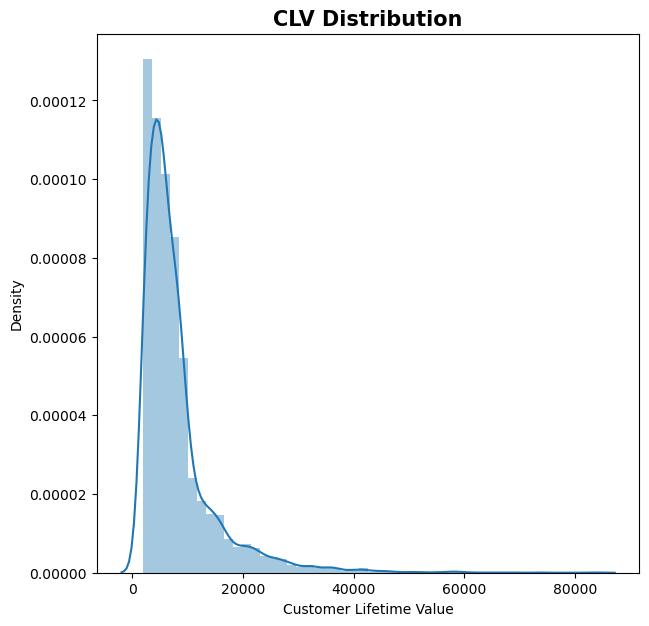

In [10]:
# melihat distribusi data CLV
plt.figure(figsize=(7, 7))
sns.distplot(df['Customer Lifetime Value'])
plt.title('CLV Distribution', size=15, weight='bold');

Dari visualisasi data di atas menunjukan bahwa data ini memiliki distribusi Right-Skewed. Terdapat skewness positif pada fitur Customer Lifetime Value.

Distribusi right-skewed menunjukkan bahwa sebagian besar nilai CLV cenderung lebih rendah, sementara beberapa nilai tinggi menarik ekor distribusi. Hal ini menunjukkan adanya nilai-nilai ekstrem yang lebih tinggi dari rata-rata, yang dapat mempengaruhi analisis statistik dan pemodelan.

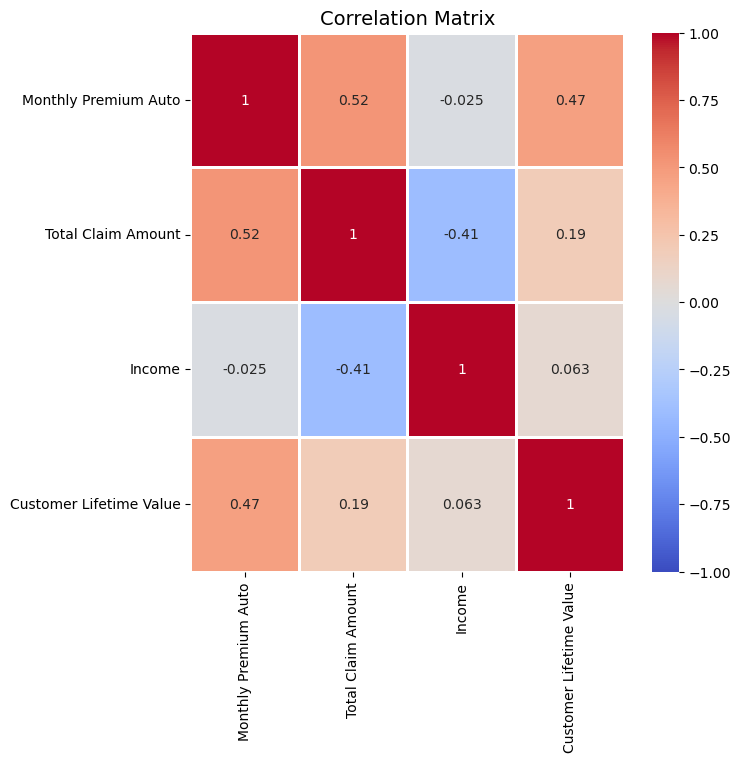

In [11]:
# Memisahkan feature kategorikal dan numerikal
kategori = ["Vehicle Class", "Coverage", "Renew Offer Type", "Employment Status", "Marital Status", "Education", "Number of Policies"]
numerik = ["Monthly Premium Auto", "Total Claim Amount", "Income", "Customer Lifetime Value"]

# Melihat corelasi matrix antara fitur numerik
plt.figure(figsize=(7, 7), facecolor="none")

# Menggunakan metode 'spearman' 
correlation_matrix = df[numerik].corr(method='spearman')

# Membuat heatmap dengan warna yang berbeda (misalnya, 'coolwarm')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=1, vmin=-1, vmax=1)

plt.title("Correlation Matrix", size=14)
plt.show()


Correlation matrix menunjukkan bahwa :

- Nilai korelasi antara CLV dengan Monthly Premium Auto adalah 0.47 Hal ini menunjukkan bahwa terdapat korelasi yang sedang antara CLV dengan Monthly Premium Auto. 

- Nilai korelasi antara CLV dengan Total Claim Amount adalah 0.19 Hal ini menunjukkan bahwa terdapat korelasi yang lemah.Jumlah klaim yang diajukan oleh pelanggan tidak terlalu berpengaruh terhadap CLV.

- Nilai korelasi antara CLV dengan Income adalah 0.063 Hal ini menunjukkan bahwa terdapat korelasi yang sangat lemah. Artinya, pendapatan pelanggan tidak terlalu berpengaruh terhadap CLV.

Dapat disimpulkan bahwa faktor yang paling berpengaruh terhadap Customer Lifetime Value adalah Monthly Premium Auto. Faktor-faktor lain, seperti Total Claim Amount dan Income, memiliki pengaruh yang lebih kecil.


**Outlier**

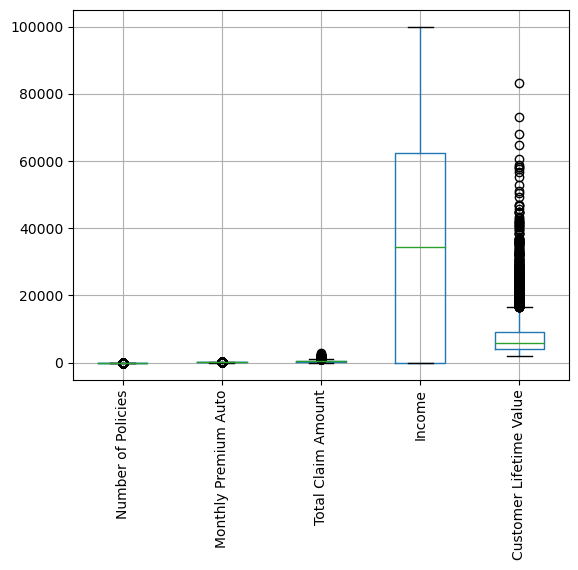

In [12]:
# Plot boxplot untuk mengecek outliers
df.boxplot(rot=90);

Terdapat Outlier pada Feature Monthly Premium Auto, Total Claim Amount, dan Customer LifeTime Value

<Figure size 1000x500 with 0 Axes>

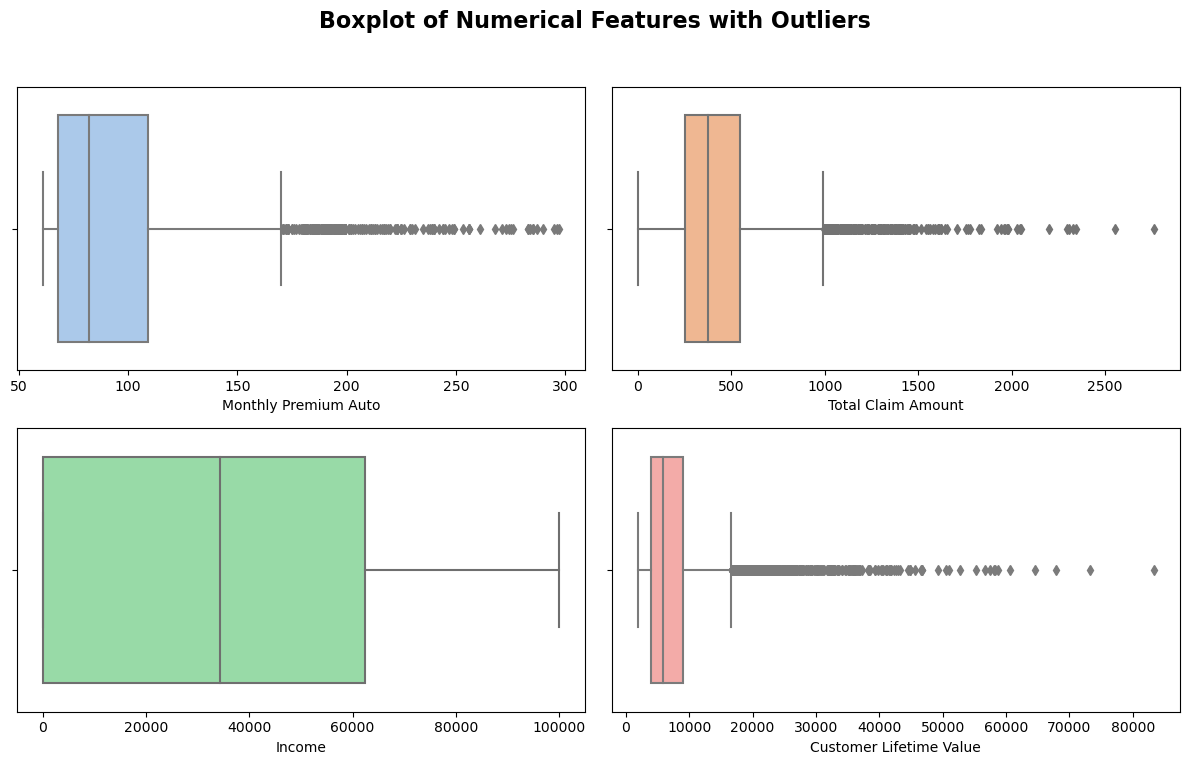

In [13]:
# alternatif untuk visualisasi outlier menggunakan boxplot

# Membuat warna yang berbeda untuk setiap boxplot
colors = sns.color_palette("pastel")

# Set ukuran figure
plt.figure(figsize=(10, 5), facecolor='white')

# Menggunakan subplots untuk menampilkan boxplot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Menambahkan boxplot dengan warna yang berbeda
for i, feature in enumerate(numerik):
    sns.boxplot(x=feature, data=df, ax=axes[i//2, i%2], color=colors[i])

# Menambahkan judul dan menyesuaikan layout
plt.suptitle('Boxplot of Numerical Features with Outliers', size=16, weight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Tampilkan plot
plt.show()


Terdapat Outlier pada Feature Monthly Premium Auto, Total Claim Amount, dan Customer LifeTime Value. Outlier-outlier ini dapat mempengaruhi performa dari model yang akan dibuat. Untuk itu perlu adanya analisis untuk mengetahui tindakan yang diperlukan untuk data outliers.

Disisi lain Outlayer pada CLV kita hapus karena fokus pada customer dengan clv <20000 agar bisa melakukan up selling atau cross selling untuk menaikan income dan profit perusahaan
Untuk Outlier feature Total Klaim Amount, dan Monthly Premium Auto juga akan dihapus memakai batasan IQR karena berdasarkan EDA semakin tinggi CLV semakin tinggi juga Total Klaim Amount, dan Monthly Premi Auto (bisa dilihat pada grafik di bawah)

In [14]:
# Fungsi untuk mengecek IQR dan limit
def outlier (data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')    

In [15]:
outlier(df['Customer Lifetime Value'])

IQR: 5064.1236284999995
limit_bawah: -3631.744438749999
limit_atas: 16624.75007525


In [16]:
df[df['Customer Lifetime Value'] > 16646.5203465].count()['Customer Lifetime Value']

449

Terdapat 449 outliers pada kolom Customer Lifetime Value.

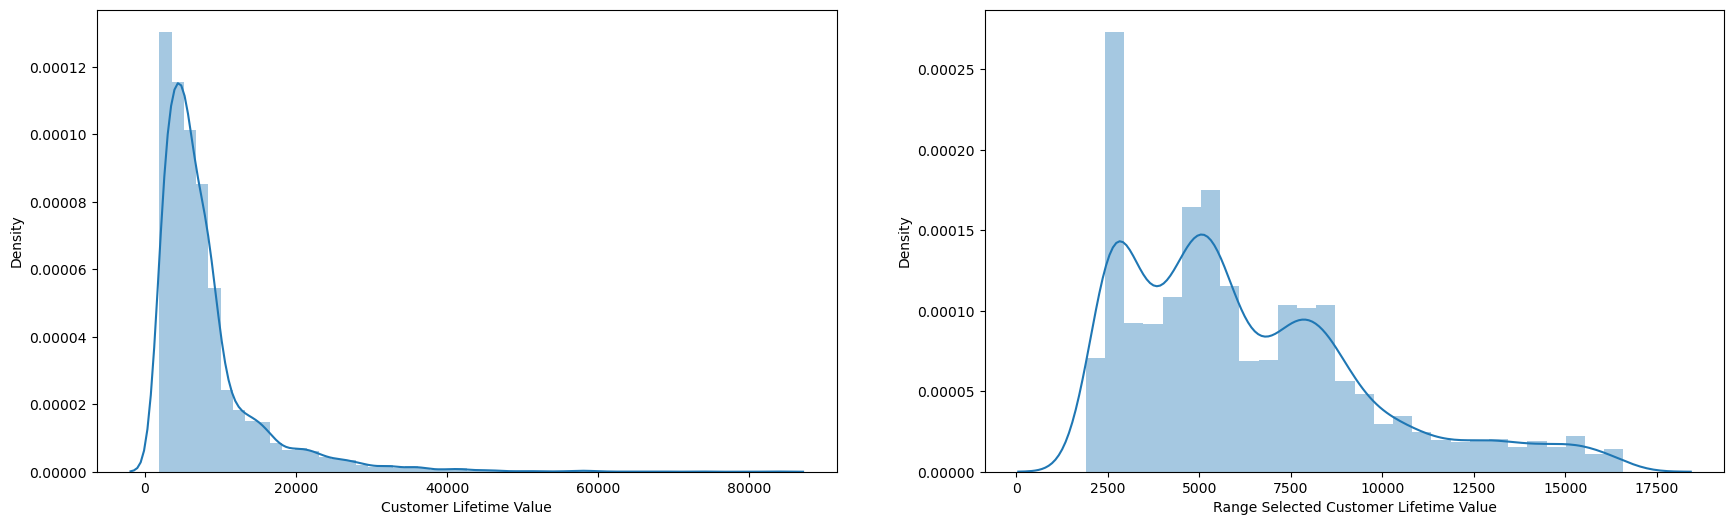

In [17]:
# Melakukan filtering pada data
df_model = df[(df['Customer Lifetime Value'] <= 16646.5203465)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['Customer Lifetime Value'], ax=axes[0])
sns.distplot(df_model['Customer Lifetime Value'], ax=axes[1])
axes[0].set_xlabel('Customer Lifetime Value')
axes[1].set_xlabel('Range Selected Customer Lifetime Value')
plt.show()

In [18]:
print("Statistik Deskriptif Sebelum Data Outliers pada Variabel Customer Lifetime Value Dihapus")
display(df[numerik].describe())
print("Statistik Deskriptif Setelah Data Outliers pada Variabel Customer Lifetime Value Dihapus")
display(df_model[numerik].describe())

Statistik Deskriptif Sebelum Data Outliers pada Variabel Customer Lifetime Value Dihapus


,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5051.000000,5051.000000,5051.000000,5051.000000
mean,92.911107,429.798954,37739.838448,8059.483178
std,34.335010,293.129102,30691.452111,6989.189674
min,61.000000,0.423310,0.000000,1898.007675
25%,68.000000,251.776304,0.000000,3964.441004
50%,82.000000,374.400000,34322.000000,5837.528088
75%,109.000000,548.123122,62471.500000,9028.564632
max,297.000000,2759.794354,99934.000000,83325.381190


Statistik Deskriptif Setelah Data Outliers pada Variabel Customer Lifetime Value Dihapus


,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,4602.000000,4602.000000,4602.000000,4602.000000
mean,90.584528,420.104245,37587.835289,6325.184168
std,30.844160,279.398375,30665.844042,3320.547103
min,61.000000,0.423310,0.000000,1898.007675
25%,68.000000,251.526302,0.000000,3708.569393
50%,80.000000,369.868595,34140.500000,5505.112198
75%,107.000000,541.740429,62212.250000,8169.469198
max,297.000000,2759.794354,99934.000000,16589.712370


In [19]:
#outlier pada kolom Monthly Premium Auto
outlier(df['Monthly Premium Auto'])

IQR: 41.0
limit_bawah: 6.5
limit_atas: 170.5


In [20]:
df[df['Monthly Premium Auto'] > 170.5].count()['Monthly Premium Auto']

252

Terdapat 252 outliers pada kolom Monthly Premium Auto.

In [21]:
# statistik deskriptif terhadap kolom "Monthly Premium Auto" berdasarkan kelompok kendaraan ("Vehicle Class")
df.groupby("Vehicle Class")["Monthly Premium Auto"].describe().sort_values("50%")

,count,mean,std,min,25%,50%,75%,max
Vehicle Class,,,,,,,,
Two-Door Car,1059.0,76.674221,14.420455,61.0,66.0,71.0,86.0,119.0
Four-Door Car,2565.0,77.020663,14.142962,61.0,66.0,72.0,86.0,119.0
SUV,963.0,120.860852,18.966141,100.0,108.0,116.0,129.0,199.0
Sports Car,262.0,122.190840,19.335559,100.0,109.0,116.0,132.0,199.0
Luxury Car,101.0,207.792079,30.933256,180.0,187.0,193.0,223.0,297.0
Luxury SUV,101.0,209.386139,27.256181,180.0,192.0,199.0,219.0,287.0


Menghapus data outliers pada variabel Monthly Premium auto, diamana batas atas yang didapatkan dari perhitungan IQR adalah 170.5 Dollar, tidak dilakukan. Ketika data dengan nilai Monthly Premium Auto diatas nilai batas atas, maka 2 buah kelas dari variabel Vehivle Class, Luxury Car & Luxury SUV akan hilang. Oleh karena itu, Penghapusan Data Outliers berdasarkan variabel monthly Premium Auto tidak akan dilakukan.

In [22]:
# outlier pada kolom Total Claim Amount
outlier(df['Total Claim Amount'])

IQR: 296.34681750000004
limit_bawah: -192.74392225000005
limit_atas: 992.6433477500001


In [23]:
df[df['Total Claim Amount'] > 992.6433477500001].count()['Total Claim Amount']

217

Terdapat 217 outliers pada kolom Total Claim Amount.

In [24]:
# statistik deskriptif terhadap kolom "Total Claim Amount" berdasarkan kelompok kendaraan ("Vehicle Class")
df.groupby("Vehicle Class")["Total Claim Amount"].describe().sort_values("50%")

,count,mean,std,min,25%,50%,75%,max
Vehicle Class,,,,,,,,
Four-Door Car,2565.0,346.106756,198.864261,0.423310,208.885686,336.000000,454.358500,1310.461580
Two-Door Car,1059.0,347.867548,193.766877,1.332349,230.655925,336.000000,456.488343,1261.943541
SUV,963.0,573.174610,289.953148,0.517753,412.467956,556.800000,734.400000,1654.202174
Sports Car,262.0,550.563401,299.232668,5.573179,343.433805,556.800000,706.592595,1516.383753
Luxury SUV,101.0,1059.876385,518.991688,1.587888,825.657746,998.400000,1328.839129,2552.343856
Luxury Car,101.0,1103.927488,518.906203,32.874675,873.600000,1008.569798,1396.702365,2759.794354


ketika data outilers pada variabel Total Claim Amount dihapus (dengan nilai batas atas = 992.6433477500001 Dollar), tidak ada kelas pada variabel kategorik yang terhapus. Akan tetapi, data pada kelas Luxury Car dan Luxury SUV, dengan nilai median Total Claim Amount masing-masing kelas 998.400000 Dollar dan 1008.569798 Dollar, lebih dari setengah data pada kelas tersebut dihapus. Untuk itu, sebaiknya tindakan penghapusan data outliers pada variabel Total Claim Amount jangan dilakukan, kecuali jika hasil dari model kurang memuaskan.

kesimpulan : 
- Outlayer pada CLV di hapus karena fokus pada customer dengan clv <20000 agar bisa melakukan up selling atau cross selling untuk menaikan income dan profit perusahaan. Untuk Outlier variabel Total Klaim Amount, dan Monthly Premium Auto tidak dihapus karena setelah melihat statistik deskriptif terhadap kolom Total Klaim Amount, dan Monthly Premium Auto berdasarkan kelompok kendaraan ("Vehicle Class") ada pertimbangan pada kolom Luxury Car dan Luxury SUV.

## 4. Modeling

In [25]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from catboost import CatBoostRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

**Encoding**

Agar dapat menggunakan semua fitur, maka fitur-fitur kategorikal harus diubah menjadi fitur numerikal. Kita dapat menggunakan ColumnTransformer untuk dapat mengubah tipe datanya, yang mana nanti dapat diaplikasikan pada pipeline model.

In [26]:
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# Mapping digunakan untuk ordinal encoder
coverage_mapping = [{"col" : "Coverage",
                   "mapping" : {None : 0, "Basic" : 1,"Extended" : 2, "Premium" : 3}}]
rot_mapping = [{"col" : "Renew Offer Type",
                "mapping" : {None : 0, "Offer1" : 1,"Offer2" : 2, "Offer3" : 3, "Offer4" : 4}}]
education_mapping = [{"col" : "Education",
                      "mapping" : {None : 0, "High School or Below" : 1,"College" : 2, "Bachelor" : 3, "Master" : 4, "Doctor" : 5}}]


transformer = ColumnTransformer([
    ("onehot", OneHotEncoder(drop = "first"), ["Vehicle Class", "Employment Status", "Marital Status"]), # Onehot encoder untuk data nominal
    ("coverage_ordinal", ce.OrdinalEncoder(mapping = coverage_mapping), ["Coverage"]),                   # Ordinal encoder untuk data ordinal
    ("rot_ordinal", ce.OrdinalEncoder(mapping = rot_mapping), ["Renew Offer Type"]),                     # ---------------//-----------------
    ("education_ordinal", ce.OrdinalEncoder(mapping = education_mapping), ["Education"])                 # ---------------//-----------------
], remainder = "passthrough")

**Data Splitting**

In [27]:
# Membagi data menjadi 2, yaitu Feature dan Data Target
Feature = df_model.drop(columns='Customer Lifetime Value')
Target = df_model['Customer Lifetime Value']

In [28]:
# Membagi data menjadi 2, yaitu Data Train dan Data Test
X_train, X_test, y_train, y_test = train_test_split(Feature,
                                                    Target,
                                                    test_size=0.2,
                                                    random_state=48)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3681, 10)
(3681,)
(921, 10)
(921,)


Membuat Column transformer yang berisikan Encoder dan metode yang digunakan adalah One Hot Encoder, OHE berfungsi untuk merepresentasikan nilai dalam variabel kategorik kedalam bentuk value numerik. Selanjutnya menerapkannya kedalam semua Data kategorik dalam X_train.

In [29]:
# Mengubah value fitur kategorikal menjadi numerikal (Encode)
transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), X_train.select_dtypes('object').columns)
    ], remainder='passthrough')

**Benchmark Model**

Model Benchmarking adalah proses membandingkan kinerja berbagai model dengan tujuan untuk menentukan model dengan parameter default terbaik yang memiliki nilai RMSE MAPE dan MAE terbaik.


In [30]:
# Inisialisasi Algoritma
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=48)
rf = RandomForestRegressor(random_state=48)
xgb = XGBRegressor(random_state=48)
ada = AdaBoostRegressor(random_state=48)
gbr = GradientBoostingRegressor(random_state=48)
# Membuat list berisi keseluruhan Algoritma yang digunakan
models = [lr, knn, dt, rf, xgb, ada, gbr]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=48)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', RobustScaler()),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error'
        )
 # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error'
    )

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error'
    )
    print(model_cv_rmse, i)
    print(model_cv_mae, i)
    print(model_cv_mape, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())
    
    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-2634.58948937 -2921.17277794 -2864.98432769 -2853.05014352
 -2745.77780041] LinearRegression()
[-2077.44062555 -2167.07824736 -2110.33026748 -2097.40672608
 -2064.29164291] LinearRegression()
[-0.39514033 -0.37759361 -0.37781885 -0.37846954 -0.38674305] LinearRegression()
[-2711.40581766 -2927.06088049 -2793.89808468 -2773.83064897
 -2801.33993858] KNeighborsRegressor()
[-1882.21034802 -1943.22000906 -1924.24526143 -1869.7351337
 -1899.54295378] KNeighborsRegressor()
[-0.36489419 -0.34091823 -0.36069223 -0.33487139 -0.35146547] KNeighborsRegressor()
[-1219.26672209 -1400.82672336 -1258.30345286 -1345.98539415
 -1226.23027196] DecisionTreeRegressor(random_state=48)
[-427.99339011 -502.35519462 -448.39341375 -477.84581948 -438.54527134] DecisionTreeRegressor(random_state=48)
[-0.05717378 -0.05873076 -0.05276036 -0.05548964 -0.05481966] DecisionTreeRegressor(random_state=48)
[ -820.7739845  -1054.76630163 -1078.93900973 -1063.07204022
  -909.2568949 ] RandomForestRegressor(random_state=

In [31]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
benchmark_model = pd.DataFrame({
    'Model': ['Linear Regression',
              'KNN Regressor',
              'Decision Tree Regressor',
              'Random Forest Regressor',
              'XGBoost Regressor',
              'Ada Boost Regressor',
              'Gradient Boosting Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape,
}).sort_values('Mean_RMSE', ascending=False) # diurutkan dari RMSE paling tinggi 

benchmark_model

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
6,Gradient Boosting Regressor,-935.850789,113.000164,-416.438760,25.631600,-0.054251,0.002058
3,Random Forest Regressor,-985.361646,102.463326,-381.473726,35.131031,-0.045274,0.002472
4,XGBoost Regressor,-1043.953059,97.732460,-466.918916,26.391613,-0.069111,0.004086
2,Decision Tree Regressor,-1290.122513,71.402098,-459.026618,27.302526,-0.055795,0.002038
5,Ada Boost Regressor,-1426.800515,24.395915,-1050.294414,22.682079,-0.158558,0.004428
1,KNN Regressor,-2801.507074,70.293533,-1903.790741,26.894594,-0.350568,0.011385
0,Linear Regression,-2803.914908,101.925634,-2103.309502,35.615106,-0.383153,0.006898


- Berdasarkan nilai RMSE,Gradient Boosting Regressor dan Random Forest Regressor adalah model terbaik.
- Selanjutnya, akan dilakukan prediksi pada test set dengan 2 benchmark model terbaik. 

**Predict to Test Set with the Benchmark Model**

Prediksi pada test set dengan menggunakan model Gradient Boosting dan Random Forest

In [32]:
# Benchmark 2 model terbaik
models = {
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=48),
    'Random Forest Regressor' : RandomForestRegressor(random_state=48)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', MinMaxScaler()),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
Gradient Boosting Regressor,848.494685,363.027468,0.048571
Random Forest Regressor,934.167601,367.592937,0.045825


Dari hasil prediksi pada data test model terbaiknya adalah `Gradient Booster Regressor`. Maka langkah selanjutnya adalah melakukan Hyperparameter pada model Gradient Booster Regressor untuk tujuan menemukan parameter terbaik dari Gradient Booster Regressor.

**Hyperparameter Tuning**

Hyperparameter tuning adalah proses untuk mengoptimalkan nilai suatu model dengan menemukan kombinasi parameter yang menghasilkan score terbaik. Metode Hyperparameter Tuning bekerja dengan cara melakukan percobaan berulang-ulang dengan berbagai kombinasi parameter menggunakan RandomizedSearchCV.

Parameter yang diatur dari model Gradient Boosting Regressor ini adalah :
1. kedalaman maksimum pohon (max_depth)
2. tingkat pembelajaran (learning_rate) 
3. jumlah estimator (pohon) (n_estimators) 
4. subsample (persentase sampel yang digunakan dalam setiap pohon)
5. fitur maksimum yang digunakan dalam pemisahan setiap pohon (max_features)
6. 'Scaler' yang menunjukkan pilihan metode scaling, yaitu robust, standard, dan minmax.

In [33]:
# Pipeline
pipeline_gbr = Pipeline([
    ('prep', transformer),
    ('Scaler', RobustScaler()),
    ('model', gbr)
])

# Define scaler
standard = StandardScaler()
minmax = MinMaxScaler()
robust = RobustScaler()
scaler = [standard, minmax, robust] 

from sklearn.model_selection import RandomizedSearchCV

# Definisikan hyperparameter space
hyperparam_space_gbr = {
    'model__max_depth': [3, 4, 5, 6],
    'model__learning_rate': [0.01, 0.025, 0.05, 0.1],
    'model__n_estimators': [200, 300, 400, 500],
    'model__subsample': [0.6, 0.7, 0.8, 0.9],
    'model__max_features': [0.4, 0.5, 0.6, 0.7],
    'Scaler' : scaler
}

# Gunakan RandomizedSearchCV
random_gbr = RandomizedSearchCV(
    pipeline_gbr,
    param_distributions=hyperparam_space_gbr,
    cv = KFold(n_splits=5, shuffle=True, random_state=48), 
    scoring = 'neg_root_mean_squared_error',
    n_jobs = -1,
    return_train_score=True
)


In [34]:
# Melakukan fit kepada data train untuk menemukan settingan parameter terbaik.
random_gbr.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=48, shuffle=True),
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               Index(['Vehicle Class', 'Coverage', 'Renew Offer Type', 'EmploymentStatus',
       'Marital Status', 'Education'],
      dtype='object'))])),
                                             ('Scaler', RobustScaler()),
                                             ('model',
                                              GradientBoostingRegressor(random_state=48))]),
                   n_jobs=-1,
                   param_distributions={'Scaler': [StandardScaler(),
                                                   MinMaxScaler(),
                                                   RobustScaler()],
                                        'model__learning_rate': [0.01, 0.025,
                                                                 0.05, 0.1],
                                        'model__max_depth': [3, 4, 5, 6],
                                        'model__max_features': [0.4, 0.5, 0.6,
                                                                0.7],
                                        'model__n_estimators': [200, 300, 400,
                                                                500],
                                        'model__subsample': [0.6, 0.7, 0.8,
                                                             0.9]},
                   return_train_score=True,
                   scoring='neg_root_mean_squared_error')

In [35]:
# Melihat nilai terbaik dari berbagai kombinasi parameter.
random_gbr.best_score_

-944.467921912728

In [36]:
random_gbr.best_params_

{'model__subsample': 0.6,
 'model__n_estimators': 200,
 'model__max_features': 0.6,
 'model__max_depth': 5,
 'model__learning_rate': 0.025,
 'Scaler': MinMaxScaler()}

In [37]:
#Melihat hasil tuning dalam bentuk dataframe
pd.DataFrame(random_gbr.cv_results_).sort_values(by=['rank_test_score']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__n_estimators,param_model__max_features,param_model__max_depth,param_model__learning_rate,param_Scaler,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.498974,0.109311,0.028031,0.006208,0.6,200,0.6,5,0.025,MinMaxScaler(),...,-944.467922,132.456945,1,-802.476232,-751.012405,-730.401693,-730.539644,-780.396064,-758.965208,28.424021
6,1.456033,0.015894,0.018909,0.006169,0.8,200,0.4,4,0.025,RobustScaler(),...,-955.712699,128.972012,2,-925.555359,-866.867961,-855.988830,-859.789898,-905.038473,-882.648104,27.657146
4,2.664588,0.023185,0.025098,0.007740,0.7,400,0.4,4,0.05,MinMaxScaler(),...,-964.647297,122.110942,3,-713.148678,-659.995206,-635.861299,-639.489369,-686.690985,-667.037107,29.301704
5,5.363987,0.063785,0.041199,0.009299,0.8,500,0.5,5,0.025,StandardScaler(),...,-970.134236,123.018473,4,-605.992581,-564.725452,-544.293732,-545.789664,-596.080135,-571.376313,25.459543
1,4.939011,0.197729,0.035755,0.006294,0.8,500,0.5,4,0.05,MinMaxScaler(),...,-971.994373,114.167214,5,-616.874482,-574.527035,-564.961940,-555.951091,-603.782409,-583.219391,23.272106


In [38]:
# Melakukan Prediksi menggunakan best parameter terhadap data test.
# Define model terhadap estimator terbaik
from sklearn.model_selection import RandomizedSearchCV
gbr_tuning = random_gbr.best_estimator_

# Melakukan prediksi model terhadap data test
y_pred_gbr_tuning = gbr_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning setelah tuning
rmse_gbr_tuning = np.sqrt(mean_squared_error(y_test, y_pred_gbr_tuning))
mae_gbr_tuning = mean_absolute_error(y_test, y_pred_gbr_tuning)
mape_gbr_tuning = mean_absolute_percentage_error(y_test, y_pred_gbr_tuning)

# Menampilkan hasil RMSE yang menurun setelah tuning
compare_tuning_score = pd.DataFrame({
    'Gradient Boosting Regressor': ['Sebelum Tuning', 'Sesudah Tuning'],
    'RMSE': [score_before_tuning.iloc[0, 0], rmse_gbr_tuning],
    'MAE':  [score_before_tuning.iloc[0, 0], mae_gbr_tuning],
    'MAPE': [score_before_tuning.iloc[0, 0], mape_gbr_tuning]
})
compare_tuning_score



,Gradient Boosting Regressor,RMSE,MAE,MAPE
0,Sebelum Tuning,848.494685,848.494685,848.494685
1,Sesudah Tuning,847.639680,342.645294,0.043559


Model mengalami peningkatan performa (nilai RMSE, MAE & MAPE berkurang) dengan dilakukannya hyperparameter tuning

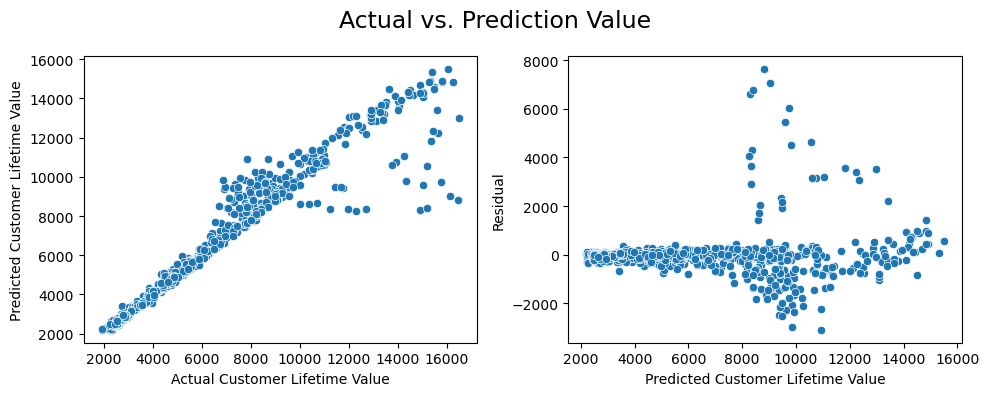

In [39]:
fig, axs =  plt.subplots(1, 2, figsize=(10, 4), facecolor = "none")

sns.scatterplot(y = y_pred_gbr_tuning, x = y_test, ax = axs[0])
axs[0].set_xlabel("Actual Customer Lifetime Value")
axs[0].set_ylabel("Predicted Customer Lifetime Value")

sns.scatterplot(x = y_pred_gbr_tuning, y = y_test - y_pred_gbr_tuning, ax = axs[1])
axs[1].set_xlabel("Predicted Customer Lifetime Value")
axs[1].set_ylabel("Residual")

fig.suptitle("Actual vs. Prediction Value", size = 17)
fig.tight_layout()

Grafik ini menunjukkan regresi linier antara nilai aktual dan nilai prediksi dengan garis regresi yang membantu memahami hubungan antara keduanya.

In [40]:
residual = pd.DataFrame({'y_test' : y_test,
              'y_pred': y_pred_gbr_tuning,
              'Residual' : (y_pred_gbr_tuning- y_test)
})
residual

,y_test,y_pred,Residual
4103,3857.947176,4343.212185,485.265009
3006,5085.023369,5426.582930,341.559561
3897,8071.334962,8149.556333,78.221371
3917,8661.735884,8602.450029,-59.285855
357,9566.839884,10250.991299,684.151415
...,...,...,...
3930,12689.428040,12182.906769,-506.521271
112,4620.390087,4630.906096,10.516009
3682,14886.706020,14253.198749,-633.507271
4411,2554.189234,2642.133835,87.944601


In [44]:
residuals = y_test - y_pred_gbr_tuning
# Menghitung jumlah dan total bias di atas 2000 dan di bawah -2000
count_above_2000 = sum(residual > 2000 for residual in residuals)
sum_above_2000 = sum(residual for residual in residuals if residual > 2000)
count_below_minus_2000 = sum(residual < -2000 for residual in residuals)
sum_below_minus_2000 = sum(residual for residual in residuals if residual < -2000)

# Mengubah nilai bias negatif menjadi positif
sum_above_2000 = abs(sum_above_2000)
sum_below_minus_2000 = abs(sum_below_minus_2000)

# Membuat DataFrame
data = {'Jumlah Data': [count_above_2000, count_below_minus_2000],
        'Total Bias': [sum_above_2000, sum_below_minus_2000]}
index = ['Di atas 2000', 'Di bawah -2000']
df_bias = pd.DataFrame(data, index=index)

# Menambahkan sum jumlah total data dan total bias
df_bias.loc['Total'] = df_bias.sum()

# Menghitung rata-rata dari jumlah data dan total bias
mean_data = df_bias.loc[['Di atas 2000', 'Di bawah -2000'], 'Jumlah Data'].mean()
mean_bias = df_bias.loc[['Di atas 2000', 'Di bawah -2000'], 'Total Bias'].mean()

# Menambahkan baris rata-rata
df_bias.loc['Rata-rata'] = [mean_data, mean_bias]

# Memformat angka menjadi dua angka di belakang koma
df_bias = df_bias.round(2)

df_bias

,Jumlah Data,Total Bias
Di atas 2000,23.0,95470.13
Di bawah -2000,11.0,26305.82
Total,34.0,121775.95
Rata-rata,17.0,60887.97


Jumlah data < -2000 atau > 2000  data bias yang sangat jauh dari hasil prediksi


**kesimpulan :** 
- Performa model untuk memprediksi mulai menurun ketika CLV di angka 8.000 ke atas, walapun seperti itu sebagian besar model telah berhasil membuat prediksi yang mendekati nilai CLV

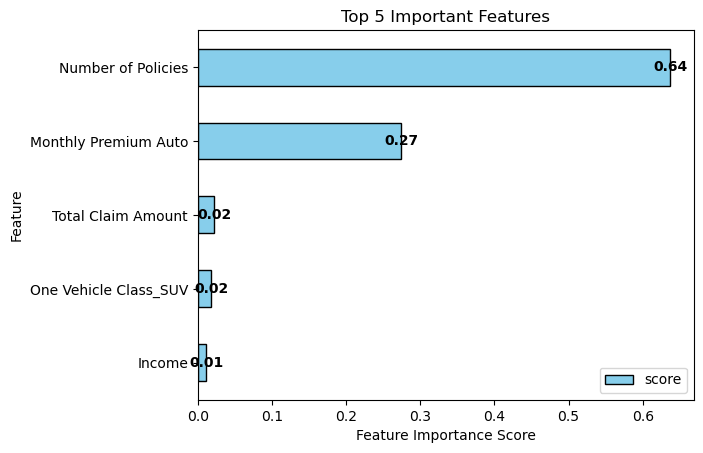

In [45]:
# Membuat dataframe feature importance
feature_imp = pd.DataFrame()
feature_imp['feature'] = random_gbr.best_estimator_.named_steps['prep'].get_feature_names_out()
feature_imp['score'] = gbr_tuning['model'].feature_importances_
feature_imp.iloc[:,0] = feature_imp.iloc[:,0].str.replace(pat=r'[A-Za-z]*__', repl='', regex=True)
feature_imp = feature_imp.set_index('feature')

# menampilkan 5 terbaik dengan warna dan gaya plot yang berbeda
top_features = feature_imp.sort_values('score', ascending=True).tail(5)
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightseagreen']
top_features.plot(kind='barh', color=colors, edgecolor='black')
for index, value in enumerate(top_features['score']):
    plt.text(value, index, f'{value:.2f}', ha='center', va='center', color='black', fontweight='bold')

plt.title('Top 5 Important Features')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.show()


- Fitur yang paling mempengaruhi CLV adalah 'Number of Policies', 'Monthly Premium Auto', dan 'Vehicle Class'.

# 5. Conclusion

# Conclusion for Model

**Metrik Evaluasi**

Metrik Evaluasi yang dipilih dalam model ini adalah `RMSE (Root Mean Square Error),MAE (Mean Absolute Error), dan MAPE (Mean Absolute Percentage Error)`. Alasannya adalah :

- RMSE: Memberikan informasi tentang sejauh mana perbedaan antara prediksi dan nilai sebenarnya. 

- MAE: Memberikan ukuran rata-rata dari selisih absolut antara prediksi dan nilai sebenarnya. Penurunan MAE menunjukkan kesalahan prediksi yang lebih rendah setelah tuning.

- MAPE: Memberikan ukuran persentase dari kesalahan rata-rata. Penurunan MAPE menjadi nilai yang sangat rendah menunjukkan model dapat memprediksi CLV dengan akurasi tinggi setelah tuning.

**Model Benchmarking**
- 2 model terbaik dari Model Benchmarking menggunakan Cross Validation yaitu :
 - `Gradient Boosting Regressor` dengan nilai RMSE: `848.4946851`
 - `Random Forest Regression` dengan nilai RMSE: `934.167601`

- Maka kedua model ini dicoba untuk melakukan prediksi terhadap data test, maka hasilnya adalah model `Gradient Boosting Regressor dengan RMSE tertinggi yaitu 848.4946851` maka kita ambil Gradient Boosting Regressor untuk dilakukan Hyperparameter Tuning untuk menemukan score terbaik dengan mencoba berbagai kombinasi parameter menggunakan RandomizedSearchCV. <br>

**Hyperparameter Tuning**
- Setelah melakukan Hyperparameter tuning didapati hasil parameter terbaiknya dalah :<br>
` 'model__subsample': 0.8`,<br>
` 'model__n_estimators': 200`,<br>
` 'model__max_features': 0.7`,<br>
` 'model__max_depth': 3`,<br>
` 'model__learning_rate': 0.05`,<br>
` 'Scaler': StandardScaler()` <br>

- Hasil Hyperparameter Tuning:

* Setelah melakukan hyperparameter tuning pada model Gradient Boosting Regressor, terjadi peningkatan kinerja model dalam beberapa metrik evaluasi. Terlihat bahwa nilai RMSE menurun dari sekitar 848.49 menjadi 846.27, yang menunjukkan bahwa model dapat lebih akurat dalam memprediksi nilai Customer Lifetime Value (CLV) setelah tuning.
* MAE juga mengalami penurunan yang signifikan dari sekitar 848.49 menjadi 367.02, menandakan bahwa model cenderung memiliki kesalahan prediksi yang lebih rendah setelah tuning.
* MAPE menurun drastis dari 848.49 menjadi 0.048649. MAPE yang lebih rendah mengindikasikan bahwa persentase kesalahan relatif terhadap nilai aktual menjadi lebih kecil setelah tuning.Jika ditinjau dari nilai MAPE yang dihasilkan oleh model setelah dilakukan hyperparameter tuning, yaitu sebesar 4%, kita dapat menyimpulkan bahwa bila nanti model yang kita buat ini digunakan untuk memperkirakan CLV pada rentang nilai seperti yang dilatih terhadap model, maka perkiraan harganya rata-rata akan meleset kurang lebih sebesar 4% dari CLV yang seharusnya. 
* Tapi, tidak menutup kemungkinan juga prediksinya meleset jauh karena bias yang dihasilkan model masih cukup tinggi. Bila dilihat dari visualisasi antara CLV aktual dan prediksi serta residual performa prediksi model mulai menurun ketika CLV sekitar 8.000 keatas. Bias yang dihasilkan oleh model ini dikarenakan oleh terbatasnya fitur pada dataset dan model butuh lebih banyak data customer lagi untuk model di maintance kedepannya menjadi lebih baik dan agar bias yang dihasilkan tidak teralu jauh dari hasil prediksi.

**Feature Importance**
- Fitur yang paling berpengaruh dalam model ini adalah: <br>
`Number of Policies dengan coeffisien 0.65` <br>
`Monthly Premium Auto dengan coeffisien 0.3`.<br>

**Limitasi**
- Limitasi dari Model ini adalah hanya bisa memprediksi akurat untuk : <br>
`nilai CLV dibawah 16624.750.` <br>
`nilai Total Claim Amount dibawah 992.64.` <br>


# Conclusion for Business

- Dari pemodelan yang sudah dilakukan, perusahaan memiliki model untuk memprediksi nilai Customer Lifetime Value, maka model ini dapat membantu bussiness problem mengenai perhitungan biaya maksimal untuk akuisisi customer. Perusahaan dapat mengatur agar biaya akuisisi tidak sampai melebihi CLV atau sebisa mungkin jauh lebih rendah dibanding CLV agar perusahaan mendapat profit maksimal. 
<br>

- Karena fitur "Number of Policies" memiliki pengaruh paling besar pada model, Perusahaan dapat fokus pada strategi untuk meningkatkan jumlah polis asuransi yang dimiliki oleh pelanggan seperti bisa melibatkan penawaran khusus, program loyalitas, atau kampanye pemasaran yang bertujuan untuk meningkatkan jumlah polis asuransi. 
<br>

- Karena fitur "Monthly Premium Auto" memiliki pengaruh yang cukup besar pada model. Perusahaan dapat mengevaluasi penetapan harga dan promosi untuk harga premi bulanan, hal ini mempunyai peluang untuk mengoptimalkan keuntungan perusahaan dari nilai premi bulanan. <br>

# 6. Recommendation


**Recommandation for Model :**

- Untuk meningkatkan akurasi prediksi CLV, perlu dilakukan analisis terhadap prediksi yang memiliki error tinggi baik itu overestimate maupun underestimate sehingga dapat mengetahui fitur-fitur apa saja yang menyebabkan error tinggi.

- Menambahkan variabel-variabel terkait dengan fitur-fitur prediksi Customer Lifetime Value (CLV) seperti `Age`,
`Years of Driving Experience`, `Number of Cars`, dan `Location`.

- Menambahkan lebih banyak lagi data agar model dapat belajar dengan baik lagi.

- Melakukan validasi model secara berkala. Karena dengan menggunakan data yang lebih baru untuk memastikan bahwa model tetap relevan dan memiliki performa yang baik terhadap data terkini.

- Melakukan eksperimen dalam manipulasi data karena eksperimen dapat membuka peluang untuk menemukan wawasan baru, mengidentifikasi fitur-fitur penting, dan meningkatkan kemampuan model untuk mengatasi variasi dalam data.

- Melakukan eksperimen menggunakan model machine learning lainnya karena melakukan pengujian berbagai model machine learning dapat membantu menemukan model yang paling sesuai dengan data.

- Melakukan eksperimen hyperparameter tuning lainnya agar mendapatkan hyperparameter tuning yang lebih lanjut dapat membantu menemukan konfigurasi parameter terbaik yang dapat meningkatkan performa model.


**Recommandation for Business :**

1. Segmentasi Pelanggan: 
* Perusahaan dapat melakukan segmentasi pelanggan yang lebih efektif berdasarkan nilai CLV pelanggan, sehingga dapat menyusun strategi pemasaran yang tepat untuk setiap segmen. Misalnya, segmen dengan CLV 20.000 ke atas mungkin menjadi target penawaran khusus atau program loyalitas yang eksklusif.

2. Melakukan Cross-Selling dan Up-Selling:
* Perusahaan dapat menargetkan pelanggan dengan Segmentasi CLV untuk penawaran cross-selling atau up-selling. Bisa dengan perusahaan menawarkan paket asuransi tambahan dengan diskon yang menarik atau meningkatkan perlindungan asuransi kepada pelanggan yang memiliki potensi untuk meningkatkan nilai polis mereka, bisa lebih difokuskan kepada segmentasi pelanggan dengan CLV 20.000 ke bawah agar CLV populasi customer kedepannya  meningkat dari 20.000 ke bawah menjadi 20.000-60.000. Dengan ini jumlah polis customer dengan CLV 20.000 ke atas akan meningkat. Dengan meningkatnya CLV Customer maka pembayaran Premi perbulannya juga akan meningkat. Ini akan meningkatkan profit dan income perusahaan. 

3. Pengembangan Produk dan Layanan: 
* Perusahaan dapat menggunakan informasi prediksi CLV untuk mengembangkan produk dan layanan baru yang sesuai dengan kebutuhan pelanggan yang berharga, meningkatkan kepuasan pelanggan, dan memperkuat loyalitas mereka. Perusahaan dapat meluncurkan polis asuransi khusus untuk segmen pelanggan dengan CLV 20.000 ke atas dengan manfaat tambahan seperti perlindungan hukum atau asuransi penyewaan mobil. 

4. Pengelolaan Biaya Akuisisi Pelanggan :
* Dengan mengetahui CLV, perusahaan dapat menghitung kembali keseimbangan antara biaya akuisisi dan nilai jangka panjang yang diharapkan dari pelanggan. Ini dapat membantu perusahaan dalam mengoptimalkan pengeluaran pemasaran dan mengalokasikan sumber daya dengan lebih efisien. 

5. Retensi Pelanggan:
* Perusahaan dapat memfokuskan upaya retensi pada pelanggan dengan CLV 20000 ke atas atau tinggi. Ini bisa dilakukan dengan memberikan pelayanan pelanggan yang baik, penawaran khusus, atau program loyalitas yang dirancang untuk mempertahankan pelanggan berharga.


Secara keseluruhan, dengan kemampuan memprediksi CLV, perusahaan asuransi mobil dapat mengoptimalkan strategi pemasaran, meningkatkan retensi pelanggan, meningkatkan penjualan produk, mengelola biaya akuisisi pelanggan, dan mengembangkan produk dan layanan yang lebih baik. Hal ini dapat berdampak positif pada keuntungan jangka panjang perusahaan, meningkatkan pertumbuhan bisnis, dan memperkuat posisi persaingan di industri asuransi mobil.

**SAVE MODEL**

In [ ]:
#import pickle

#model_clv = random_gbr.best_estimator_
#model_clv.fit(Feature, Target)

 # save with pickle
#pickle.dump(model_clv, open('Best_Model_CLV_GBR.sav', 'wb'))

In [ ]:
# Load model
#filename = 'Best_Model_CLV_GBR.sav'
#loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
# Predict with loaded model
#np.sqrt(mean_squared_error(Target, loaded_model.predict(Feature)))